In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('max_colwidth', 2000)
pd.options.display.max_rows = 200

In [2]:
js=pd.read_json('vehicles.json')

print('js length:', len(js))
print('js type:', type(js))
js.tail()

js length: 379
js type: <class 'pandas.core.frame.DataFrame'>


,Title,Price,SubLoc,AttribDictionary
374,2005 Honda Accord EX...clean cash car,$3200,(Stafford),"{'0': '<span><b>2005 Honda Accord</b></span>', '1': '<span>condition: <b>good</b></span>', '2': '<span>cylinders: <b>6 cylinders</b></span>', '3': '<span>fuel: <b>gas</b></span>', '4': '<span>odometer: <b>170000</b></span>', '5': '<span>title status: <b>clean</b></span>', '6': '<span>transmission: <b>automatic</b></span>'}"
375,2010 Honda Accord Coupe EX-L/1 Owner/Clean Title,$6750,None,"{'0': '<span><b>2010 honda accord ex-l coupe</b></span>', '1': '<span>VIN: <b>1HGCS1B85AA006714</b></span>', '2': '<span>condition: <b>like new</b></span>', '3': '<span>cylinders: <b>4 cylinders</b></span>', '4': '<span>drive: <b>fwd</b></span>', '5': '<span>fuel: <b>gas</b></span>', '6': '<span>odometer: <b>134000</b></span>', '7': '<span>paint color: <b>red</b></span>', '8': '<span>size: <b>compact</b></span>', '9': '<span>title status: <b>clean</b></span>', '10': '<span>transmission: <b>automatic</b></span>', '11': '<span>type: <b>sedan</b></span>'}"
376,"2006 HONDA CIVIC, SEDAN, 4-DOOR, 4-CYL, BEIGE COLOR",$3500,(HOUSTON),"{'0': '<span><b>2006 honda civic lx</b></span>', '1': '<span>VIN: <b>JHMFA16586S004860</b></span>', '2': '<span>condition: <b>excellent</b></span>', '3': '<span>cylinders: <b>4 cylinders</b></span>', '4': '<span>drive: <b>fwd</b></span>', '5': '<span>fuel: <b>gas</b></span>', '6': '<span>odometer: <b>166000</b></span>', '7': '<span>paint color: <b>custom</b></span>', '8': '<span>size: <b>full-size</b></span>', '9': '<span>title status: <b>clean</b></span>', '10': '<span>transmission: <b>automatic</b></span>', '11': '<span>type: <b>sedan</b></span>'}"
377,2008 HONDA ACCORD,$8450,(SUGAR LAND),"{'0': '<span><b>2008 HONDA ACCORD</b></span>', '1': '<span>condition: <b>excellent</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>94044</b></span>', '6': '<span>paint color: <b>silver</b></span>', '7': '<span>size: <b>full-size</b></span>', '8': '<span>title status: <b>clean</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: <b>sedan</b></span>'}"
378,2007 Honda CR-V,$5400,None,"{'0': '<span><b>2007 honda cr-v</b></span>', '1': '<span>condition: <b>excellent</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>164000</b></span>', '6': '<span>paint color: <b>blue</b></span>', '7': '<span>size: <b>full-size</b></span>', '8': '<span>title status: <b>clean</b></span>', '9': '<span>transmission: <b>automatic</b></span>'}"


In [3]:
js['Price'].str[1:]

0       2000
1       4200
2      14700
3       4300
4       5800
       ...  
374     3200
375     6750
376     3500
377     8450
378     5400
Name: Price, Length: 379, dtype: object

In [4]:
#Remove '$' from price and cast as float
js['Price'] = js['Price'].str[1:]
js['Price'] = js['Price'].astype('float')
js.dtypes

Title                object
Price               float64
SubLoc               object
AttribDictionary     object
dtype: object

In [5]:
js['AttribDictionary'][0:2]

0              {'0': '<span><b>2004 honda civic</b></span>', '1': '<span>condition: <b>salvage</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>86000</b></span>', '6': '<span>paint color: <b>blue</b></span>', '7': '<span>size: <b>compact</b></span>', '8': '<span>title status: <b>salvage</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: <b>sedan</b></span>'}
1    {'0': '<span><b>2009 2009 honda accord ex-l</b></span>', '1': '<span>condition: <b>good</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>181000</b></span>', '6': '<span>paint color: <b>black</b></span>', '7': '<span>size: <b>full-size</b></span>', '8': '<span>title status: <b>clean</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: 

In [6]:
js['AttribDictionary'][0]['0']

'<span><b>2004 honda civic</b></span>'

In [7]:
js['AttribDictionary'][378]['0']

'<span><b>2007 honda cr-v</b></span>'

Price Histogram:


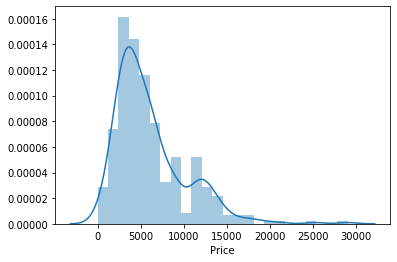

In [8]:
print('Price Histogram:')
sns.distplot(js['Price'])
plt.show()

In [9]:
from scipy import stats
from scipy.stats import norm

def normalize_feature(df, bad_feature):

    #Make histogram & normal probability plot
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(df[bad_feature], color='r', fit=stats.norm, ax=ax1)
    ax1.set_title(f'{bad_feature} Histogram - Not Normal Distribution')
    res=stats.probplot(df[bad_feature], dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')

    #Normalize with log (x+1).  Log of skewed feature: log e(feature+1)=normFeat
    #Exponential equation to undo normpr: e^normFeat-1=feature
    log_feat=np.log(df[bad_feature]+1)
        
    #Plots after normalization
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(log_feat, color='g', fit=norm, ax=ax1)
    ax1.set_title(bad_feature+' Histogram - Normal Distribution')
    res=stats.probplot(log_feat, dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')
    return log_feat

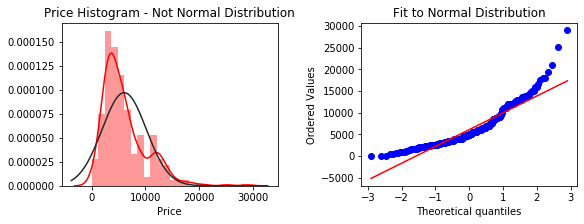

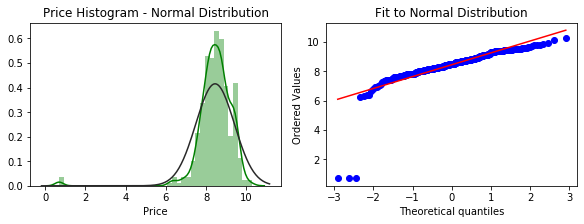

In [10]:
js['ln_Price'] = normalize_feature(df=js, bad_feature='Price')